# Introduction to Data Science

Before you hand this problem in, make sure everything runs as expected. You should **restart the kernel and run all cells** by selecting 

`Kernel --> Restart Kernel and Run All Cells`

in the menubar.

- Of course, you should use **an appropriate kernel** on the Jupyterhub of the math department or locally, so that the right modules are used and the calculations can be checked deterministically.  
- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".
- Rename this problem sheet as follows:

      ps{number of lab}_{your user name}_problem{number of problem sheet in this lab}
    
  for example
    
      ps04_blja_problem1
    
- Please fill out the cell below for **every submission**.

**Change in submission of files**: Please upload this submission until next Tuesday to your shared Nextcloud [https://tuc.cloud/](https://tuc.cloud/) directory with the name of your username which has been created during the third exercise lab.
If you have not yet been assigned to a shared Nextcloud folder, please contact me via email (jan.blechschmidt@mathematik.tu-chemnitz.de) as soon as possible.

In [1]:
NAME = "Tanay Maurya"
EMAIL = "tanay.maurya@s2024.tu-chemnitz.de"
USERNAME = "tanay@tu-chemnitz.de"

---

# Introduction to Data Science
## Lab 4: Further aspects of linear regression

### Part A - Limitations of the t-test

In this notebook, we investigate the limitations of a single-variable **t-test** for the predictor coefficients $\beta$ in a linear regression setting.
Recall the following statements from the lecture:
* Does a single small $p$-value indicate at least one variable relevant? No.
* Example: $p=100$, $H_0 : \beta_1 = \dots = \beta_p = 0$ true. Then by chance, $5\%$ of $p$-values below $0.05$. Almost guaranteed that $p<0.05$ for at least one variable by chance.
* Thus, for large $p$, looking only at $p$-values of individual $t$-statistics tends to discover spurious relationships.

In what follows, we use slightly different values than in the above mentioned example, setting $n = 100$ and $p = 20$.

In [2]:
import numpy as np

# Set parameters n (number of training samples) and p (number of predictor variables)
n = 100
p = 20

For this purpose, we generate random uncorrelated input and output vectors.

**Task**: Write the function `drawSample` that generates **uniformly distributed** arrays of random variables
* $X$ should be of size (n, p+1) with values in $[0,1)$; the first column is reserved for the intercept and should contain only ones
* $y$ should be of size (n,) with values in $[-0.5,0.5)$

In [3]:
def drawSample(n,p):
    """ This function draws a
    sample for our experiment. """
    
    # YOUR CODE HERE
    X = np.random.rand(n,p+1)
    X[:,0] = 1
    y = np.random.uniform(-0.5,0.5,n)
    return (X,y)

In [4]:
assert drawSample(40,4)[0].shape == (40,5), 'Wrong shape of X'
assert drawSample(40,4)[1].shape == (40,), 'Wrong shape of y'
assert all(drawSample(40,4)[0][:,0]==1), 'Check the first column of X'
assert drawSample(40,4)[1].min() > -0.5 and drawSample(40,4)[1].max() < 0.5, 'Wrong range of y'
assert drawSample(40,4)[0].min() > 0 and drawSample(40,4)[0].max() <= 1, 'Wrong range of X'

The following function computes single-variable t-statistics for the model
$$ y \approx X \beta $$
whose parameters $\beta \in \mathbb{R}^{p+1}$ are estimated via
$$ \hat \beta = (X^\top X)^{-1} X^\top y. $$

**Task:** Extend the function `printTStatistic`. It should **return the proportion of significant predictor variables** at a certain threshold `p_threshold`. 

In [5]:
from scipy.stats import t

def printTStatistic(X, y, p_threshold = 0.10, print_table=True):
    n, m = X.shape
    p = m - 1

    # Invert X^T * X
    V = np.linalg.inv((X.T).dot(X))
    

    # Compute regression coefficients beta
    beta = V.dot( X.T.dot(y) )

    # Extract diagonal of matrix (X^T * X)^-1
    v = V.diagonal()

    # Predict y using beta
    y_pred = X.dot(beta)

    # Compute estimate of sigma
    sigma_hat = np.sqrt( 1./(n-p-1) * np.power(y - y_pred,2).sum() )

    # Compute the standard errors
    SE = np.sqrt(v) * sigma_hat

    # Compute the values of the t-statistic
    t_vals = beta / SE

    # Compute the corresponding p values
    p_vals = 2*t.cdf(-np.absolute(t_vals), n-p-1)

    if print_table:
        
        # Print header
        print('|  Coefficient  | Estimate |    SE    | t-statistic |  p-value  | p < %4.2f |' % p_threshold)
        print('----------------------------------------------------------------------------')
        
        # Print 
        for i in range(p+1):
            pval = p_vals[i]
            if pval < 0.0001:
                pval_str = '< 0.0001'
            else:
                pval_str = '  %5.4f' % pval
            print('|    beta_%02d    |  %6.3f  |  %6.4f  |    %5.2f    | %s  |     %d    |' % (i, beta[i], SE[i], t_vals[i], pval_str, pval < p_threshold))
    
    # YOUR CODE HERE
    significant_count = np.sum(p_vals < p_threshold)
    proportion_significant = significant_count/(p)
    return proportion_significant

Now, we want to find out, how many predictor variables are statistically significant for a threshold of $0.10$ in our setting with `n = 100` and `p = 20`.

**Task**: Test the function `printTStatistic` using an example drawn with your function `drawSample`. Execute the cell multiple times (by hitting `Ctrl + Enter`).

In [6]:
# YOUR CODE HERE
n = 100
p = 20
X,y = drawSample(n,p)
printTStatistic(X, y, p_threshold=0.10);

|  Coefficient  | Estimate |    SE    | t-statistic |  p-value  | p < 0.10 |
----------------------------------------------------------------------------
|    beta_00    |  -0.229  |  0.2669  |    -0.86    |   0.3931  |     0    |
|    beta_01    |   0.215  |  0.1111  |     1.93    |   0.0567  |     1    |
|    beta_02    |  -0.106  |  0.1079  |    -0.98    |   0.3287  |     0    |
|    beta_03    |  -0.114  |  0.1107  |    -1.03    |   0.3082  |     0    |
|    beta_04    |  -0.084  |  0.1011  |    -0.83    |   0.4099  |     0    |
|    beta_05    |  -0.037  |  0.1164  |    -0.32    |   0.7528  |     0    |
|    beta_06    |   0.027  |  0.1144  |     0.24    |   0.8107  |     0    |
|    beta_07    |   0.083  |  0.1160  |     0.71    |   0.4790  |     0    |
|    beta_08    |  -0.036  |  0.1067  |    -0.34    |   0.7381  |     0    |
|    beta_09    |  -0.027  |  0.1125  |    -0.24    |   0.8108  |     0    |
|    beta_10    |  -0.120  |  0.1099  |    -1.09    |   0.2770  |     0    |

**Task**: Write a small script that carries out the experiment `1000` times and computes the mean proportion of significant values in our experiment. It should be around `p_threshold`.

**Hint 1**: Use the keyword argument `print_table` of the function `printTStatistic` to suppress the printing of the tables.

**Hint 2**: You can collect the returned values in a list initialized by `vals = []`. You can append a new value `new_val` using `vals.append(new_val)`. You can also use a `numpy.array` initialized with proper size.

In [7]:
# YOUR CODE HERE
runs = 1000
vals = []
for i in range(runs):
    new_val = printTStatistic(X, y, p_threshold = 0.10, print_table = False)
    vals.append(new_val)
mean_significant_values = np.mean(vals)
print(f"Mean proportion of significant predictors (over {runs} runs): {mean_significant_values:.4f}")

Mean proportion of significant predictors (over 1000 runs): 0.1000


### Part B: Nonlinear regression

The goal of this problem is to approximate given data points $(x_i,y_i)$ for $i=1,\ldots,n$ by polynomials of degree $p$.
This can be done by solving the linear regression problem:

$$
 y_i \approx \beta_0 + \beta_1 \, x_i + \beta_2 \, x_i^2 + \ldots + \beta_p \, x_i^p
$$

By splitting our data into a training and test data set, we want to graphically illustrate the problem of overfitting.

**Task**: Define the 'unknown' function

$$
f(x) = \sin(10 \, x) + 5 \, \cos(3 \, x)
$$

using `numpy`.

In [8]:
import numpy as np

# Define the 'unknown' function f
# YOUR CODE HERE
def f(x):
    return np.sin(10 * x) + 5 * np.cos(3 * x)

In [9]:
assert(np.abs(f(np.pi)+5) < 1e-8)
assert(np.abs(f(np.pi/2)) < 1e-8)

**Task**: Generate a uniformly distributed random vector `x` of size `n = 200`.

In [10]:
# Set random seed to make random variables 'predictable'
np.random.seed(0)

# Generate uniformly distributed data samples over [0,1)
# YOUR CODE HERE
n= 200
x = np.random.rand(n)

In [11]:
assert n == 200
assert x.shape == (200,)

**Task**: Determine the vector `y` in the following way

$$
y_i = f(x_i) + \varepsilon \, \eta_i
$$

with $\eta_i$ standard-normally distributed and $\varepsilon = 1$.

In [12]:
# YOUR CODE HERE
epsilon = 1
f_x = f(x)
n_i = np.random.randn(n)
y = f_x + epsilon * n_i

In [13]:
assert y.shape == (200,)

**Task**: Generate one figure with the following data:
* mark the **data points** $(x_i,y_i)$ as black circles
* draw the **population line** (the line representing the *unknown* function $f$) as a red solid line
* draw the **regression line** for a fitted polynomial with polynomial degree `p = 20` as a blue dashed line
* add a legend to your plot with proper labels

**Hint**: You can use the function `np.polynomial.Polynomial.fit()` to determine a regression model. This regression model contains a method `linspace()` which can be used to plot a regression line.

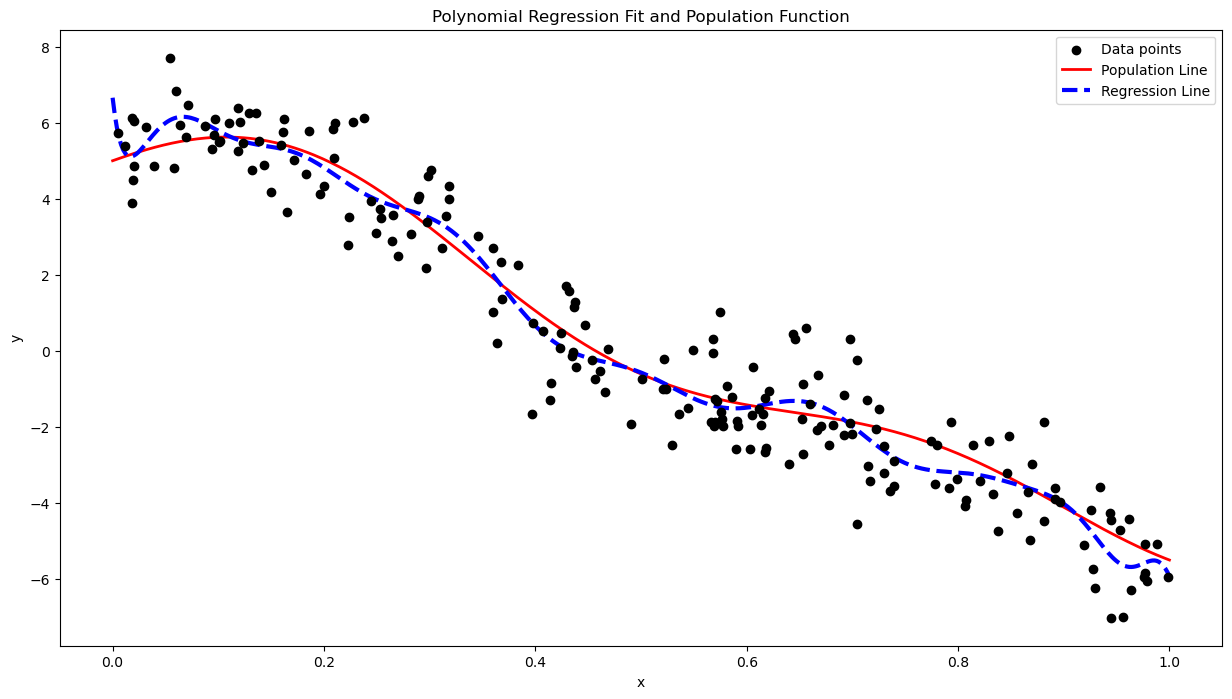

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)

fig = plt.figure(1, clear = True)

# YOUR CODE HERE
p = 20
poly_fit = np.polynomial.Polynomial.fit(x, y, p)

x_fit = np.linspace(0, 1,500)
y_fit = poly_fit(x_fit)


plt.scatter(x, y, color='black', label='Data points',zorder=5)
plt.plot(x_fit, f(x_fit), color='red', label ='Population Line', lw=2)
plt.plot(x_fit, y_fit, color='blue', linestyle='--', label ='Regression Line',lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit and Population Function')
plt.legend();

Split the dataset $(x,y)$ into a training and test set using `np.split`
- the training set should contain `ntrain` samples
- the test set should contain `n - ntrain` samples

Choose `ntrain = 80`.

In [37]:
# YOUR CODE HERE
ntrain = 80
ntest = n - ntrain
dataset = np.column_stack((x,y))
train_set, test_set = np.split(dataset, [ntrain])
xtrain, ytrain = train_set[:,0], train_set[:,1]
xtest, ytest = test_set[:,0], test_set[:,1]

In [38]:
assert(ntrain == 80)
assert(xtrain.shape == (80,))
assert(xtest.shape == (120,))

Now we want to fit polynomial models with varying polynomial degrees $p= 0,\ldots,20$.
As a quality measure, we store the training MSE (mean squared error) and the test MSE.

In [39]:
def computeMSE(y, fhatx):
    " This function returns the mean squared error between x and y."
    return np.mean(np.power(y-fhatx,2))

# Initialize lists that contain test and training mean squared errors
MSEtrain = []
MSEtest = []

# Set variable deg_range for different degrees
# YOUR CODE HERE
deg_range = range(0,21)
# raise NotImplementedError()

for j in deg_range:
    
#     # Fit polynomial of degree 'j' on training data
#     # YOUR CODE HERE
#     raise NotImplementedError()
    poly_fit = np.polynomial.Polynomial.fit(xtrain, ytrain, j)
    f_hat_xtrain = poly_fit(xtrain)
    f_hat_xtest = poly_fit(xtest)
#     # Append test and training mse to according list
#     # YOUR CODE HERE
    msetrain = computeMSE(ytrain, f_hat_xtrain)
    msetest = computeMSE(ytest, f_hat_xtest)
    MSEtrain.append(msetrain)
    MSEtest.append(msetest)

**Task**: Generate one figure that contains
- the test MSE in a semi-logarithmic plot as a blue dashed line
- the training MSE in a semi-logarithmic plot as a red solid line

against the polynomial degree.
You should use the function `plt.semilogy` and set meaningful `label`s.

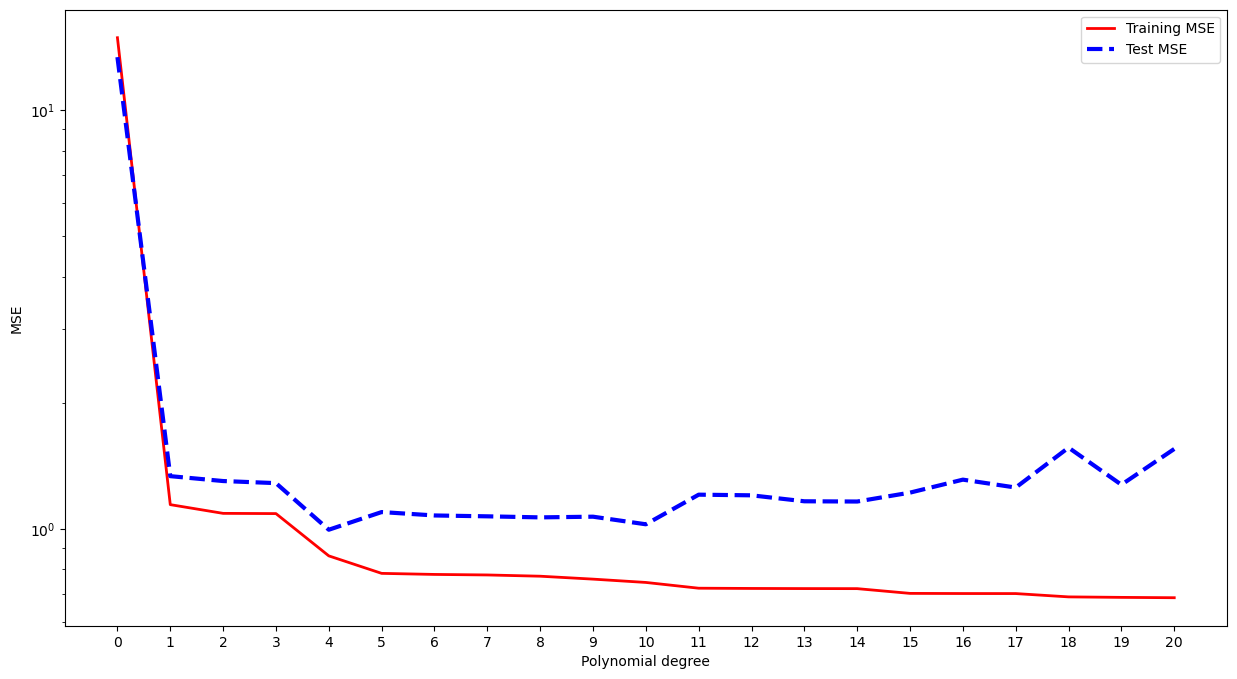

In [40]:
fig = plt.figure(2, clear=True)
# YOUR CODE HERE
plt.semilogy(deg_range, MSEtrain, color='red', label='Training MSE',lw=2)
plt.semilogy(deg_range, MSEtest, color='blue', label='Test MSE', ls='--',lw=3)
plt.xticks(deg_range)
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("MSE");